# Carga de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/Wholesale customers data.csv'

df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.head (10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


#Limpieza de datos

In [6]:
#Cambiamos las columnas en minusculas sustituir espacios por guiones bajos.
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   channel           440 non-null    int64
 1   region            440 non-null    int64
 2   fresh             440 non-null    int64
 3   milk              440 non-null    int64
 4   grocery           440 non-null    int64
 5   frozen            440 non-null    int64
 6   detergents_paper  440 non-null    int64
 7   delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
#Búsqueda de duplicados.
df.duplicated().sum()

np.int64(0)

In [9]:
#Valores nulos.

df.isna().sum()

,0
channel,0
region,0
fresh,0
milk,0
grocery,0
frozen,0
detergents_paper,0
delicassen,0


#EDA

In [15]:
df.describe()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,gasto_total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [43]:
# Crear gasto_total (suma de todas las columnas de productos)
df['gasto_total'] = df[['fresh', 'milk', 'grocery', 'frozen', 'detergents_paper', 'delicassen']].sum(axis=1)

#Categorización con percentiles 80% y 95%

df['categoria'] = pd.qcut(df['gasto_total'],
                         q=[0, 0.8, 0.95, 1],
                         labels=['Bajo', 'Medio', 'Alto'])


In [36]:
df['categoria'].value_counts()

,count
categoria,
Bajo,352
Medio,66
Alto,22


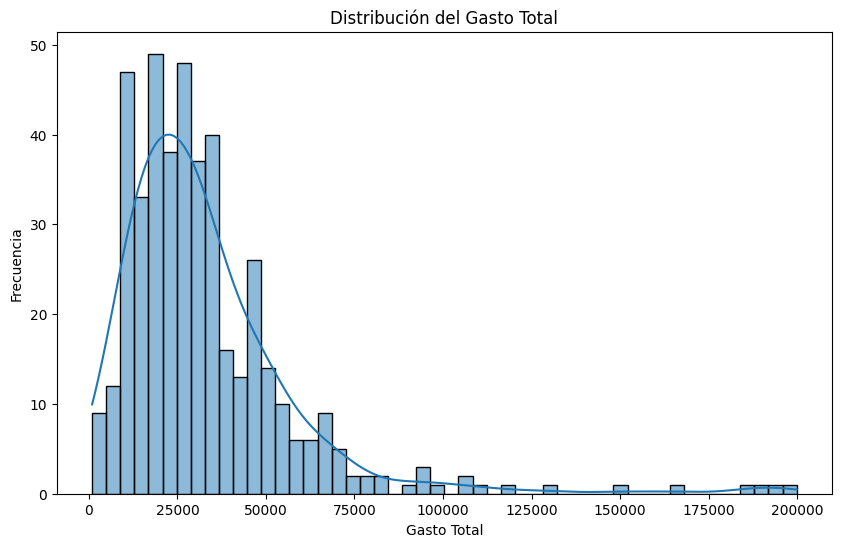

In [38]:
# Histograma del gasto total
plt.figure(figsize=(10, 6))
sns.histplot(df['gasto_total'], bins=50, kde=True)
plt.title('Distribución del Gasto Total')
plt.xlabel('Gasto Total')
plt.ylabel('Frecuencia')
plt.show()


**Interpretación del Histograma del Gasto Total:**

- El histograma muestra la distribución del gasto total de los clientes.
- La mayoría de los clientes tienen un gasto total relativamente bajo, como lo indica el pico alto en el lado izquierdo del histograma.
- La distribución es marcadamente asimétrica hacia la derecha, lo que sugiere que hay un pequeño número de clientes que gastan mucho más que el promedio.
- La línea kde (estimación de densidad de kernel) proporciona una versión suavizada del histograma, confirmando la forma de la distribución.

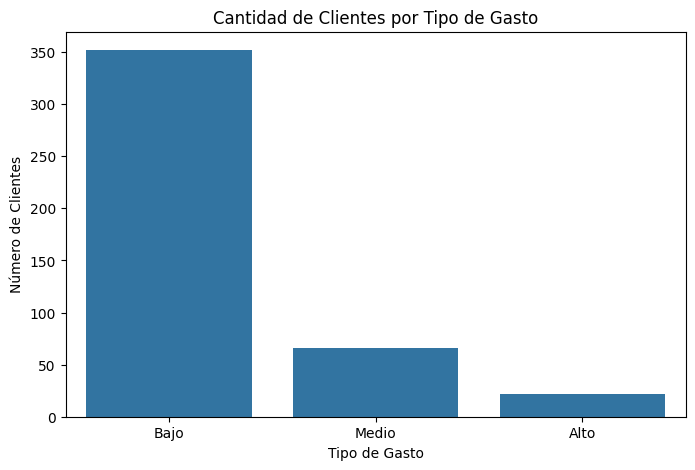

In [42]:
# Gráfico de barras del tipo de gasto
plt.figure(figsize=(8, 5))
sns.countplot(x='categoria', data=df, order=['Bajo', 'Medio', 'Alto'])
plt.title('Cantidad de Clientes por Tipo de Gasto')
plt.xlabel('Tipo de Gasto')
plt.ylabel('Número de Clientes')
plt.show()

**Interpretación del Gráfico de Barras del Tipo de Gasto:**

- Se observa que la categoría de "Bajo" gasto tiene la mayor cantidad de clientes. Esto está en línea con la observación del histograma donde la mayoría de los clientes tienen un gasto total bajo.
- Las categorías de "Medio" y "Alto" gasto tienen significativamente menos clientes en comparación con la categoría "Bajo". Esto refuerza la idea de que hay un subconjunto más pequeño de clientes que realizan gastos mayores.
- La distribución de clientes entre las categorías (Alto < Medio < Bajo) es consistente con la asimetría a la derecha vista en el histograma del gasto total.


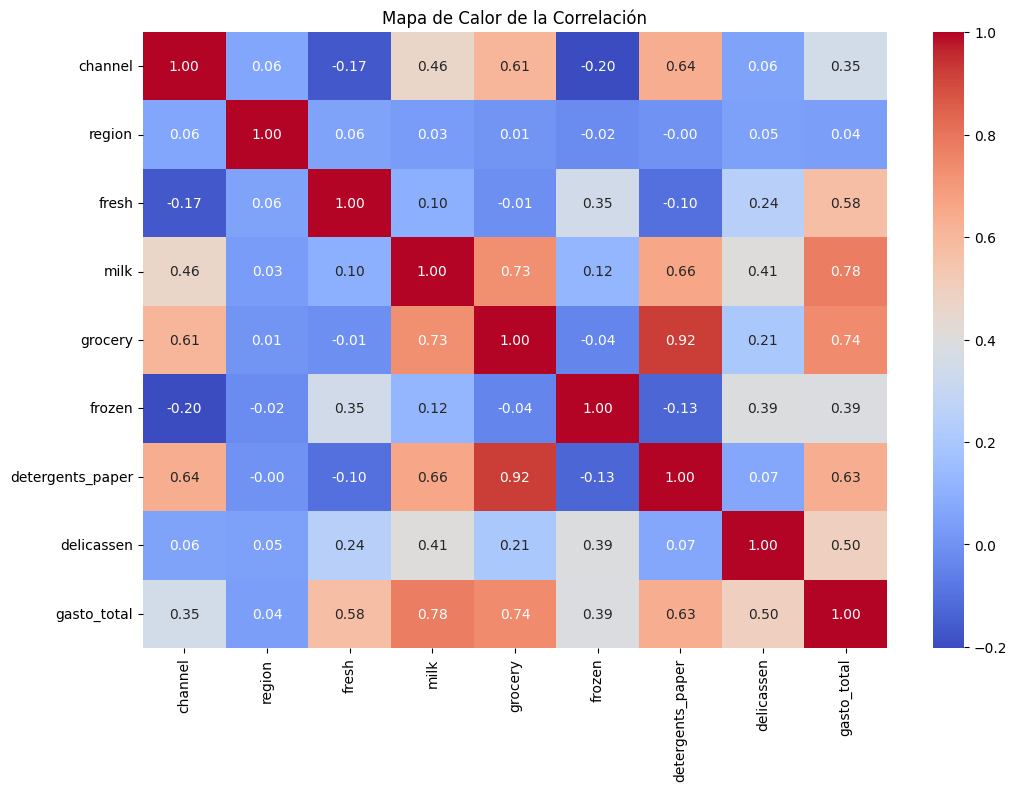

In [41]:
# Mapa de calor de la correlación entre las variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Correlación')
plt.show()

**Interpretación del gráfico mapa de calor:**
- Las altas correlaciones entre 'grocery', 'milk' y 'detergents_paper' sugieren que estos productos son comprados conjuntamente por los clientes. Esto podría usarse para agrupar productos en promociones o para entender mejor los hábitos de compra de los clientes que compran en estas categorías.
- La correlación positiva entre 'fresh' y 'frozen' podría indicar que algunos clientes compran tanto productos frescos como congelados, posiblemente como complemento.
- El análisis de la correlación puede ser útil para la selección de características en modelos de Machine Learning, identificando variables altamente correlacionadas que podrían ser redundantes. También puede ayudar a entender la estructura de los datos y las relaciones entre las variables.

# Diagnóstico y Selección de Problema:

**Características del dataset:** El conjunto contiene datos transaccionales anuales de clientes mayoristas, con variables numéricas que representan el gasto en categorías como productos frescos, lácteos, abarrotes y delicatessen, además de variables categóricas como canal de venta (minorista/Horeca) y región (Lisboa/Oporto/Otros). Se agregó una variable 'gasto_total' que muestra una distribución asimétrica (mayoría de clientes con bajo gasto) y se categorizó en niveles Bajo/Medio/Alto usando percentiles. Existe alta correlación entre productos como abarrotes, lácteos y artículos de limpieza, revelando patrones de compra conjuntos.

**Desafíos identificados:** La asimetría en 'gasto_total' complica su uso en modelos de regresión, mientras que la multicolinealidad entre variables afectaría modelos predictivos. Los datos agregados (anuales) limitan el análisis de frecuencia de compra, y la categorización por percentiles es relativa al dataset. La presencia de outliers (clientes con gastos extremos) podría distorsionar resultados.

**Problema seleccionado**: Se optó por clasificación supervisada de clientes en categorías de gasto (Bajo/Medio/Alto) mediante percentiles (80/95) permite identificar estratégicamente a los clientes de alto valor (Alto) para diseñar campañas de retención y ofertas personalizadas, al tiempo que segmenta el mercado según el potencial de gasto para optimizar recursos de marketing. Técnicamente, las variables originales de compra (fresh, milk, grocery, etc.) son predictores naturales del gasto total, y la categorización con percentiles equilibra los grupos (Bajo:80%, Medio:15%, Alto:5%).l.

